In [4]:
"""
    날짜 : 2020/08/10
    이름 : 김동욱
    내용 : 통계자료 분석 실습하기
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

In [9]:
#데이터 프레임 생성
df_koweps = pd.read_csv('./file/koweps.csv', encoding='ISO-8859-1')
df_koweps

,Unnamed: 0,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
0,1,1,1,1,10101,0.0,NaN,1,1,864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2,2,1,1,20101,0.0,NaN,1,1,600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,3,3,1,1,30101,0.0,NaN,1,1,1571.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,0.0,NaN
3,4,4,1,1,40101,0.0,NaN,1,1,3579.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2400.0,NaN,0.0,NaN
4,5,4,1,1,40101,0.0,NaN,1,1,3579.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,16660,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
16660,16661,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,3630.0,NaN,NaN,0.0,NaN
16661,16662,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,700.0,NaN,0.0,NaN
16662,16663,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [22]:
#지역별 인구수 분석(지역컬럼 : h10_reg7)
df_reg1 = df_koweps[df_koweps.h10_reg7 == 1].h10_reg7 #서울 거주 인원
df_reg2 = df_koweps[df_koweps.h10_reg7 == 2].h10_reg7 #수도권(경기/인천)
df_reg3 = df_koweps[df_koweps.h10_reg7 == 3].h10_reg7 #부산/경남
df_reg4 = df_koweps[df_koweps.h10_reg7 == 4].h10_reg7 #대구/경북
df_reg5 = df_koweps[df_koweps.h10_reg7 == 5].h10_reg7 #대전/충남
df_reg6 = df_koweps[df_koweps.h10_reg7 == 6].h10_reg7 #강원/충북
df_reg7 = df_koweps[df_koweps.h10_reg7 == 7].h10_reg7 #광주/전남/전북/제주

print('1 : ', df_reg1.count())
print('2 : ', df_reg2.count())
print('3 : ', df_reg3.count())
print('4 : ', df_reg4.count())
print('5 : ', df_reg5.count())
print('6 : ', df_reg6.count())
print('7 : ', df_reg7.count())

data1 = np.array([df_reg1.count(),
                 df_reg2.count(),
                 df_reg3.count(),
                 df_reg4.count(),
                 df_reg5.count(),
                 df_reg6.count(),
                 df_reg7.count()])

1 :  2486
2 :  3711
3 :  2785
4 :  2036
5 :  1467
6 :  1257
7 :  2922


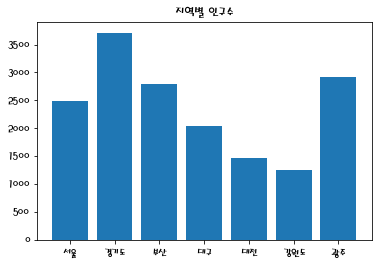

In [68]:
#그래프 출력
plt.title('지역별 인구수')
plt.bar(['서울', '경기도', '부산', '대구', '대전', '강원도', '광주'], data1)
plt.show()

In [43]:
#나이대별 그래프 출력
#출생년도, 지역 컬럽을 갖는 데이터 프레임 생성
df_age = df_koweps.loc[:, ['h10_g4', 'h10_g10']]
df_age

#파생변수 age 생성
df_age['age'] = 2020 - df_age.h10_g4
df_age

#파생변수 gen 생성
df_age.loc[(df_age.age >=  0) & (df_age.age <  10), 'gen'] = 0
df_age.loc[(df_age.age >= 10) & (df_age.age <  20), 'gen'] = 10
df_age.loc[(df_age.age >= 20) & (df_age.age <  30), 'gen'] = 20
df_age.loc[(df_age.age >= 30) & (df_age.age <  40), 'gen'] = 30
df_age.loc[(df_age.age >= 40) & (df_age.age <  50), 'gen'] = 40
df_age.loc[(df_age.age >= 50) & (df_age.age <  60), 'gen'] = 50
df_age.loc[(df_age.age >= 60) & (df_age.age <  70), 'gen'] = 60
df_age.loc[(df_age.age >= 70) & (df_age.age <  80), 'gen'] = 70
df_age.loc[(df_age.age >= 80) & (df_age.age <  90), 'gen'] = 80
df_age.loc[(df_age.age >= 90) & (df_age.age < 100), 'gen'] = 90
df_age

,h10_g4,h10_g10,age,gen
0,1936,2,84,80.0
1,1945,2,75,70.0
2,1948,2,72,70.0
3,1942,3,78,70.0
4,1923,2,97,90.0
...,...,...,...,...
16659,1967,1,53,50.0
16660,1992,5,28,20.0
16661,1995,5,25,20.0
16662,1998,0,22,20.0


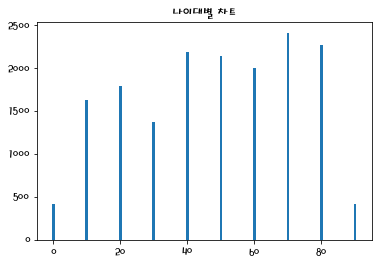

In [71]:
#나이대별 카운트 집계
g0 = df_age[df_age.gen ==  0].gen.count()
g10 = df_age[df_age.gen == 10].gen.count()
g20 = df_age[df_age.gen == 20].gen.count()
g30 = df_age[df_age.gen == 30].gen.count()
g40 = df_age[df_age.gen == 40].gen.count()
g50 = df_age[df_age.gen == 50].gen.count()
g60 = df_age[df_age.gen == 60].gen.count()
g70 = df_age[df_age.gen == 70].gen.count()
g80 = df_age[df_age.gen == 80].gen.count()
g90 = df_age[df_age.gen == 90].gen.count()

#그래프 출력
plt.title('나이대별 차트')
plt.bar([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        [g0, g10 ,g20, g30, g40 ,g50, g60, g70, g80, g90])
plt.show()

In [70]:
#한글 폰트 깨짐 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:4]

a = fm.FontProperties(fname=font_list[3])
a.get_name()

rc('font', family="Magic R")